# Laboratorio 1: Regresión en Boston
---
- Ashley Quezada 
- Matias Ugrin 
- Nicolas E Ponce
- Sergio Sulca
- Gustavo Álvarez
- Julieta Borre
---
En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context(context='talk', font_scale=1.2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split

X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0
    )

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea
---
Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**1-** El conjunto de datos trata sobre diferentes variables asociadas a caracteristicas representativas de una recidencia como el numero de 
habitaciones, tambien aquellas asociadas al vecindario, como la cercania al rio 
Charles, como asi tambien la concentracion de aire contaminado, entre otras. El 
fin de las caracteristicas es usarlas para el estudio de los valores de las 
propiedades en Boston.  


**2-** La variable objeto que debemos predecir es `MEDV`. Representa el valor 
medio de las casas ocupadas por sus dueños evaluada en miles de dolares.  


**3-** Los atributos disponibles para hacer la prediccion son:  

 - `CRIM`     per capita crime rate by town  
 - `ZN`       proportion of residential land zoned for lots over 25,000 sq.ft.  
 - `INDUS`    proportion of non-retail business acres per town  
 - `CHAS`     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
 - `NOX`      nitric oxides concentration (parts per 10 million)  
 - `RM`       average number of rooms per dwelling  
 - `AGE`      proportion of owner-occupied units built prior to 1940  
 - `DIS`      weighted distances to five Boston employment centres  
 - `RAD`      index of accessibility to radial highways  
 - `TAX`      full-value property-tax rate per $10,000  
 - `PTRATIO`  pupil-teacher ratio by town  
 - `B`       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
 - `LSTAT`    % lower status of the population  
   
        
**4-** Atributos determinantes en primer lugar seria `NOX` porque el objetivo de los investigadores era generar estimaciones cuantitativas de la inclinacion a pagar por una mejor calidad del aire. `CRIM`, como los investigadores usan el
modelo *edonic housing price*, entonces la importancia de una zona segura influye en la calidad de vida y por lo tanto en el costo. Y un tercer escalon `LSTAT` porque entendemos que el estatus socioeconomico de la población en un
vecindario es lo que le da mayor o menor valor a una propiedad.
 


**5-** Dado la antiguedad de los datos y el año de publicación del paper se observan variables que hoy en día no tendrian lugar como la variable `B`, que mide la proporción de afroamericanos por ciudad, la cual posee dilemas eticos y la variable `CHAS` puede resultar un sesgo ya que no tiene en cuenta el valor de estar lejos o cerca del rio, etonces no se sabe la distancia exacta como asi tampoco la altura del rio. 


## Ejercicio 2: Visualización de los Datos
---

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

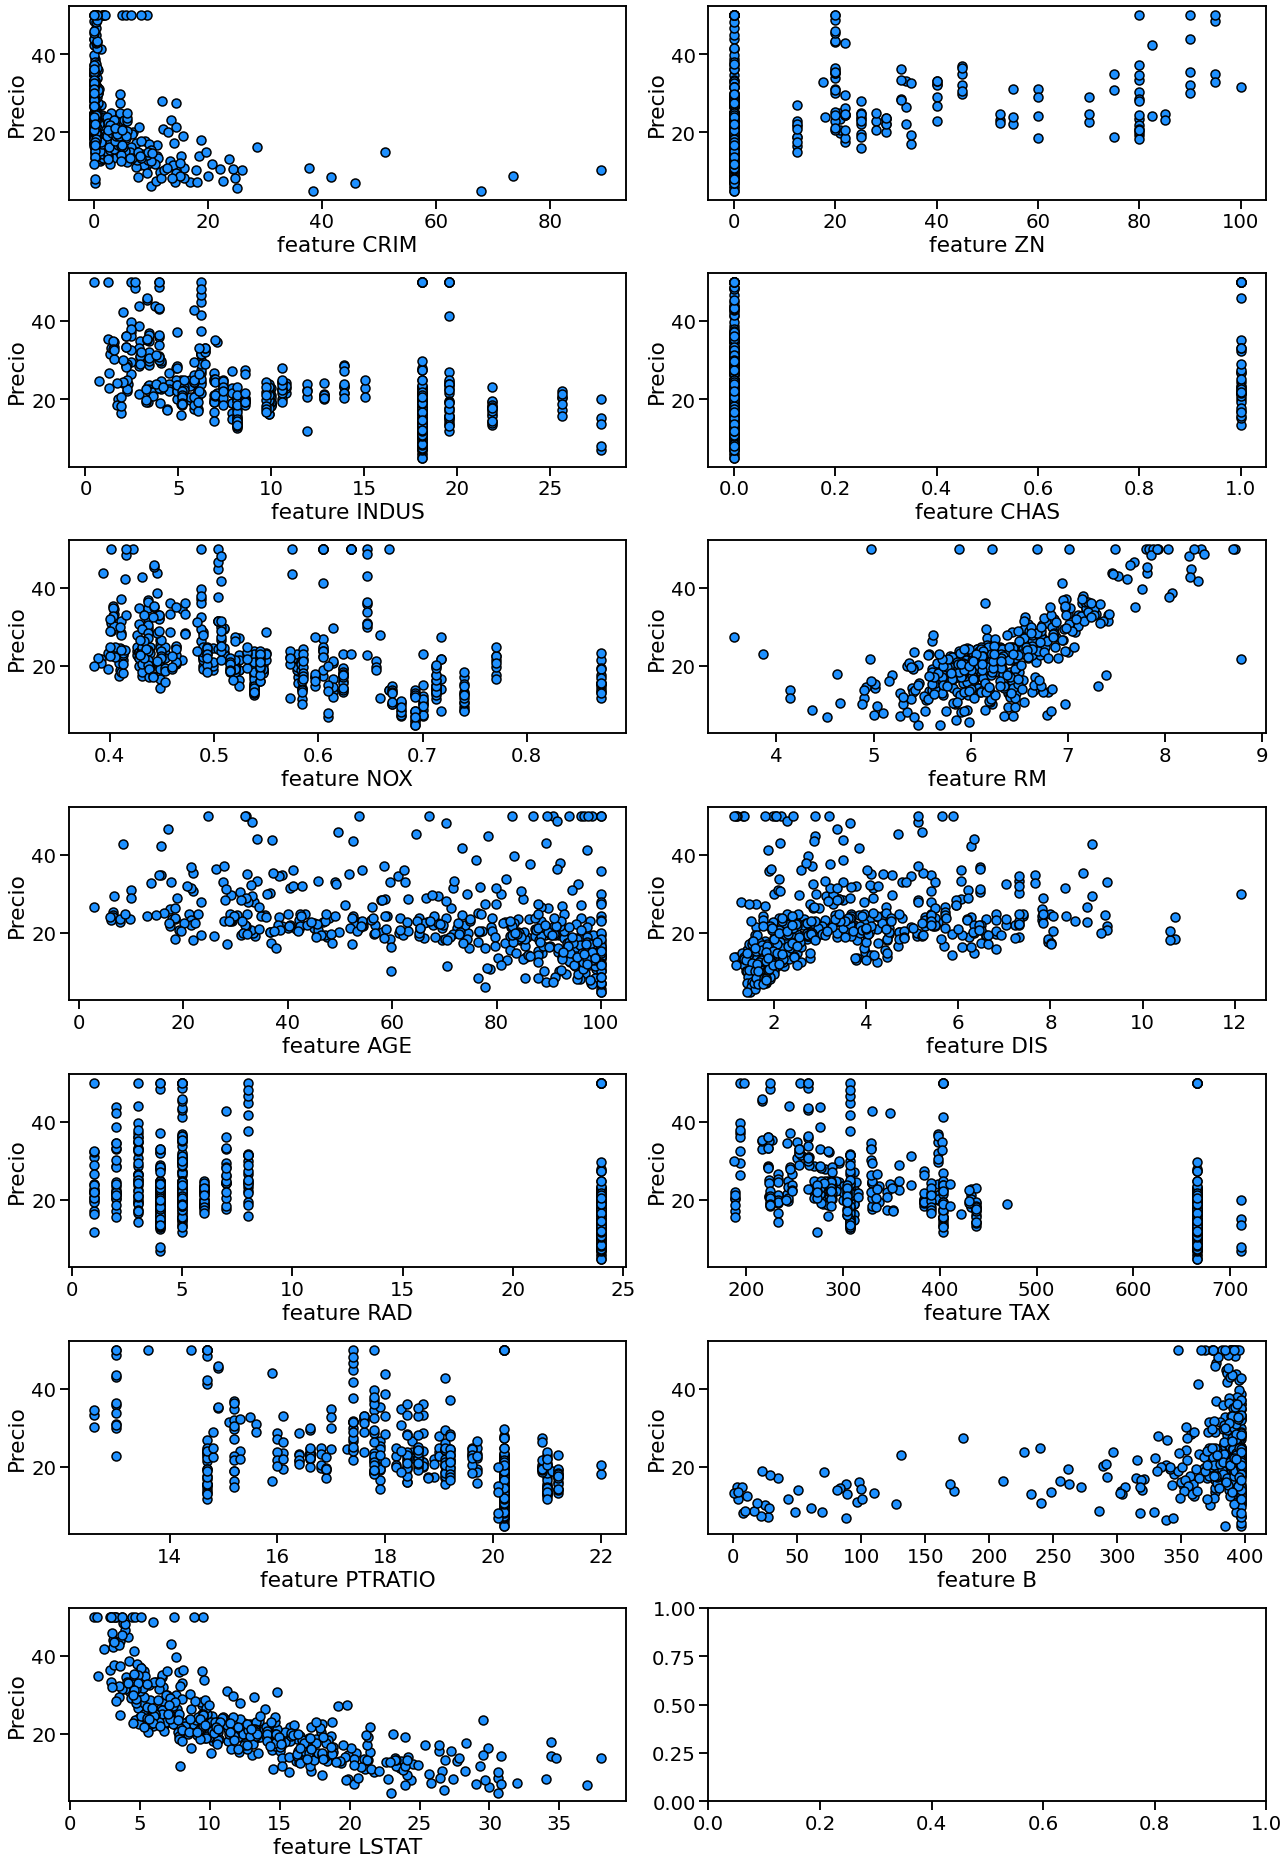

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
fig, axs = plt.subplots(7, 2, figsize=(18, 26))
axs = axs.ravel()
names = boston['feature_names']
for i in range(len(names)):
    selector = (boston['feature_names'] == names[i])
    axs[i].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[i].set_xlabel(f'feature {names[i]}')
    axs[i].set_ylabel('Precio')
fig.tight_layout()
plt.show()

### 2.3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

1. `RM`
2. `LSTAT`
3. `CRIM`
4. `AGE`

Para estas variables se observa una relacion mas clara con el precio de las viviendas, por ejemplo para `RM` que representa el numero de habitaciones, tiene una tendencia positiva a medida que aumenta el numero de las mismas.

`LSTAT` tiene una tendecia negativa ya que es entendible que a mayor 
porcentaje de poblacion de clase baja, los precios disminuyan, esto puede estar
influenciado al conciderarse esas zonas como inseguras, carecenientes de
servicios como la salud.

`CRIM` existe una una relacion clara con las zonas menos inseguras y el alto
precio de las casas.

`AGE ` para esta feature tambien se observa una tendencia decreciente aunque 
menor, ante la edad de una vivienda y el precio de la misma. 

## Ejercicio 3: Regresión Lineal
---

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### 3.1. Seleccione **un solo atributo** que considere puede ser el más apropiado.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

### 3.2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.


In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### 3.3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.


In [ ]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.5}')


Train error: 42.82
Test error: 46.907


### 3.4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.


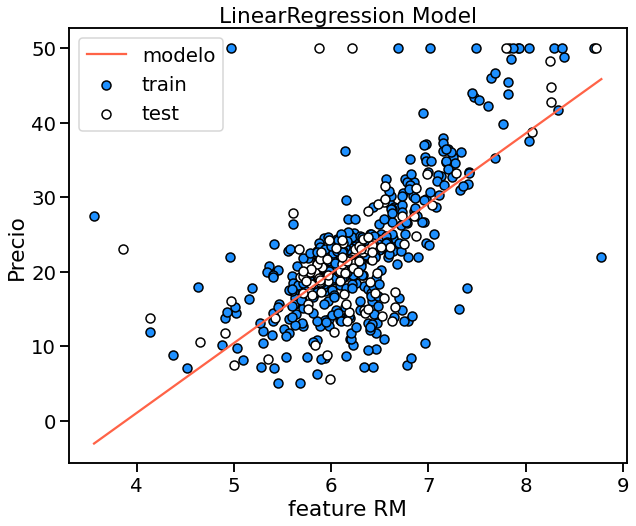

In [ ]:
# 4. Graficar acá. Ayuda:
plt.figure(figsize=(10,8))
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", 
            label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.xlabel(f'feature {feature}')
plt.ylabel('Precio')
plt.title('LinearRegression Model')
plt.legend()
plt.show()

### 5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

De acuerdo al ultimo modelo obtenido, en pricipio el modelo parece aproximarse a los datos, ya que refleja el aumento en los precios cuanto mayor es el numero de habitaciones promedio. Sin embargo el **Sesgo** es muy grande, ya que ECM es grande. Entonces el echo ajustar usado un modelo lineal y usar una sola feature para modelar los datos es insuficiente ya que la influencia de las caracteristicas restantes se esta dejando de lado.

## Ejercicio 4: Regresión Polinomial
----


En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### 4.1. Para varios grados de polinomio, haga lo siguiente:
  
  1. Instancie y entrene una regresión polinomial.
  2. Prediga y calcule error en entrenamiento y evaluación 
  Imprima los valores.
  3. Guarde los errores en una lista.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 1. Resolver acá.
train_errors = []
test_errors = []
degrees = range(0,10)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 39.79473116372652
Train Error: 37.74552897028126


### 4.2. Grafique las curvas de error en términos del grado del polinomio.

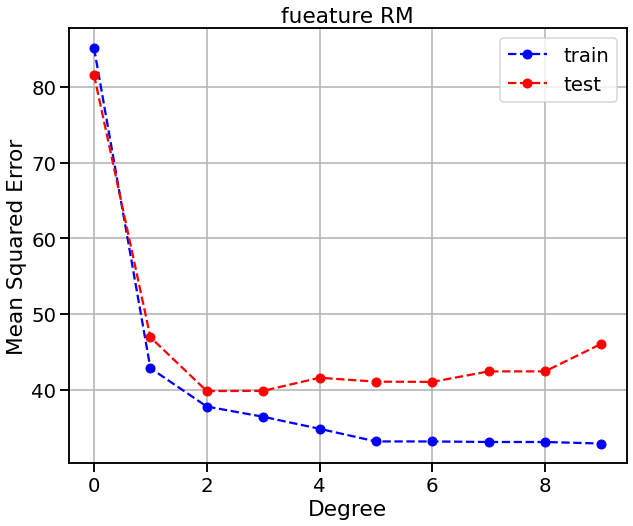

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors, color="blue", label="train", 
         marker='o', linestyle='--')
plt.plot(degrees, test_errors, color="red", label="test", 
         marker='o', linestyle='--')

plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title(f'fueature {feature}')
plt.legend()
plt.grid()
plt.show()

### 4.3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

El el grafico anterior se puede observar que usar un modelo polinomial de grado dos tiene una mejor generalizacion de los datos ya que es el punto mas bajo de la funcion costo(ECM) del conjunto test. Por otro lado a partir del grado 2, medida que se aumentan los grados, menor es el error en el conjunto de entrenamiento, pero menor es la generalizacion, entonces estamos en precencia del sobreajuste.

### 4.4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

Train error: 37.746
Test error: 39.795


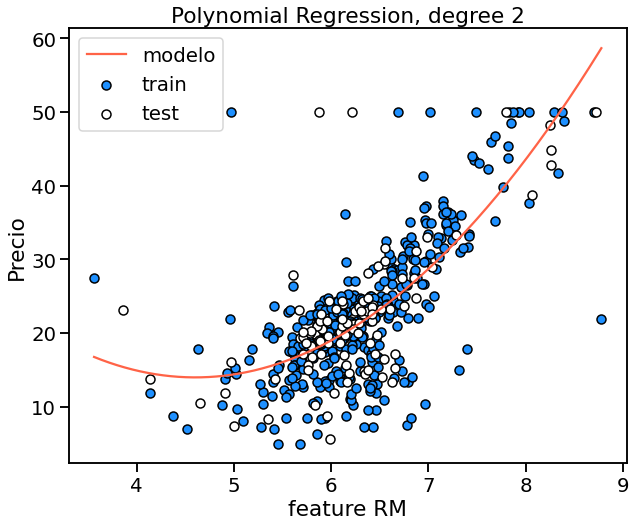

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)
    
# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.5}')


plt.figure(figsize=(10,8))
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", 
            label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(f'Polynomial Regression, degree {degree}')
plt.xlabel(f'feature {feature}')
plt.ylabel('Precio')
plt.legend()
plt.show()

### 5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

Para un modelo polinomial de grado 2 usando la feature `RM` , se observa un mejor ajuste sobre los datos, ya que el ECM usando este modelo es menor (tanto en test como en training) que el modelo lineal usado en el punto anterior. 

Este modelo presenta un sesgo considerable en cuanto al compotamiento para valores bajos del numero de habitaciones promedio, ya que se observa una tendencia negativa del precio, entre 1 y 4 habitaciones promedio por vivienda, el cual no refleja el comportamiento real. Entendemos que este comportamiento se deba a la influencia de las caracteristicas restantes.

## Ejercicio 5: Regresión con más de un Atributo

---
En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### 5.1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

In [ ]:
# 1. Resolver acá. Ayuda (con atributos):
selector = ((boston['feature_names'] == 'RM') | 
            (boston['feature_names'] == 'LSTAT') |
            (boston['feature_names'] == 'CRIM')|
            (boston['feature_names'] == 'AGE'))
           # (boston['feature_names'] == 'NOX'))
           
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 4), (102, 4))

### 5.2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

In [ ]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = range(1,4) #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 29.410127528795908
Train Error: 13.705298581198813


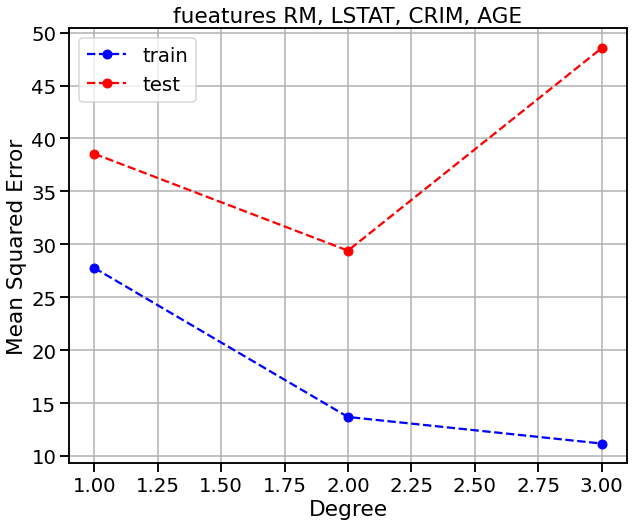

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors, color="blue", label="train",
         marker='o', linestyle='--')
plt.plot(degrees, test_errors, color="red", label="test",
         marker='o', linestyle='--')

plt.legend()
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title('fueatures RM, LSTAT, CRIM, AGE')
plt.grid()
plt.show()

### 3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?


Tomando los 5 atributos seleccionados se obtiene un modelo que tiene una mejor generalizacion comparada con los anteriores, ya que el error para el testset es menor es menor que los modelos anteriores (`29.49`). Tambien este grafico mustra que a partir del grado 2, el test error aumenta, dando como resultado modelos menos precisios 

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.





In [ ]:
X_train_fs = X_train
X_test_fs = X_test
X_train_fs.shape, X_test_fs.shape

((404, 13), (102, 13))

In [ ]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = range(1,4) #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 25.215797416856976
Train Error: 6.310156128322766


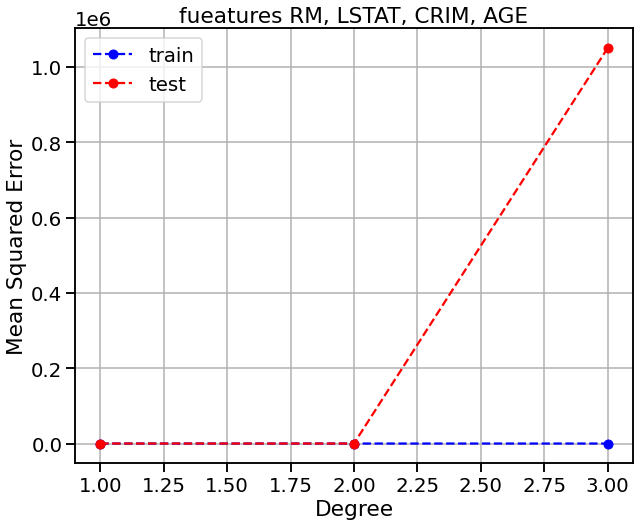

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors, color="blue", label="train",
         marker='o', linestyle='--')
plt.plot(degrees, test_errors, color="red", label="test",
         marker='o', linestyle='--')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title('fueatures RM, LSTAT, CRIM, AGE')
plt.grid()
plt.show()

Tomando todos los atributos se obtiene un modelo con una mayor generalizacion que con los anteriores, con un error para el testset de (`25.21`) e incluso tiene un menor sesgo en los datos de entrenamiento `6.31` comparada con el anterior modelo usando 5 features de `13.28`. Este resultado confirman nuestras sospechas que si bien se puede aproximar un comportameinto con un modelo lienal usando una sola feature, se debe de tener en cuenta todas las fueatures de este set ya que todas ellas contribuyen  la estimacion del precio de una vivienda en boston.


### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
from sklearn.linear_model import Ridge

train_errors = []
test_errors = []

n_alphas = 10
degree = 2
alphas = np.logspace(0, 2, n_alphas) 

for alpha in alphas:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), 
                          Ridge(alpha=alpha))
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 22.521996290431304
Train Error: 5.882315144595081


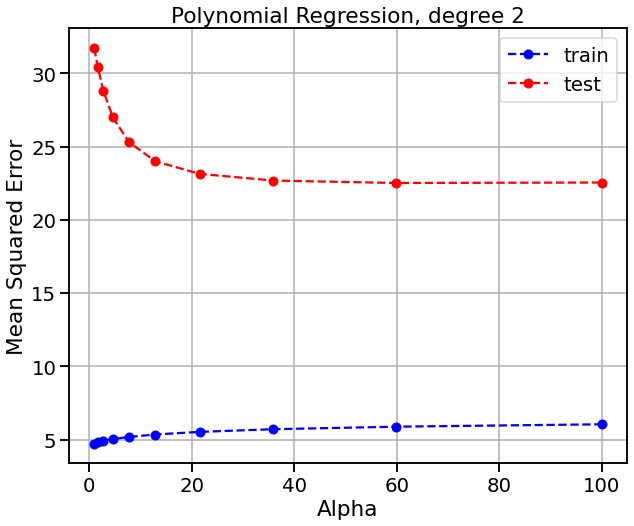

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,8))
plt.plot(alphas, train_errors, color="blue", label="train",
         marker='o', linestyle='--')
plt.plot(alphas, test_errors, color="red", label="test",
         marker='o', linestyle='--')

plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("degree = 2")
plt.title(f'Polynomial Regression, degree {degree}')

plt.grid()
plt.show()

Se observan mejoras con respecto a los modelos anteriores a medida que se aumenta el alpha, esto es lo que se espera ya que cuando alfa es muy grande, penaliza a los valores mas grandes de los W's.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq8-1-1024x198.png" width=50%>



Con un apha de `60` tenemos la mejor generalizacion de todos los modelos previos con un error en test set de `22.52`, y un sesgo de `5.88` en el trainig set.


Si el valor de alpha tiende a ser muy grande entonces su efecto sobre los W's es mayor y por lo tanto estos tienden a 0 produciendo aumento en el sesgo (incremente en la liena azul).